In [1]:
import csv
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [2]:
iterations = 40
k = 20
regularization_factor = 0.1
learning_rate = 0.01
data_path = 'ratings.csv'

In [3]:
def get_max():
    max_m=0
    max_u=0
    with open(data_path) as f:
        r=csv.reader(f)
        for r1 in r:
            p=r1
            if(int(p[0])>max_m):
                max_m=int(p[0])
            if(int(p[1])>max_u):
                max_u=int(p[1])
    return max_m,max_u

In [4]:
x,y=get_max()
print(x)
print(y)

9723
609


In [5]:
def latent_factor_recommnder(data_path, regularization_factor, learning_rate, iterations, k):
    x,y=get_max()
    err=[]
    e=0
    Q = np.random.uniform(0.0, np.sqrt(5/k), size=(x+1, k))
    P = np.random.uniform(0.0, np.sqrt(5/k), size=(y+1, k))
    for i in range(iterations):
    
        with open(data_path) as file:
            readcsv=csv.reader(file, delimiter = ',')
            for row in readcsv:
                e = 2 * (int(row[2]) - np.dot(Q[int(row[0])],np.transpose(P[int(row[1])])))
                P[int(row[1])] = P[int(row[1])] + learning_rate * (e * Q[int(row[0])] - 2*regularization_factor * P[int(row[1])])
                Q[int(row[0])] = Q[int(row[0])] + learning_rate * (e * P[int(row[1])] - 2*regularization_factor * Q[int(row[0])])
        error = 0
        p = np.sum(np.square(LA.norm(P, 2, axis=1)))
        q = np.sum(np.square(LA.norm(Q, 2, axis=1)))
        with open(data_path) as file:
            reader = csv.reader(file, delimiter=',')
            for row in reader:
                error = error + (int(row[2]) - Q[int(row[0])].dot(np.transpose(P[int(row[1])]))) **2
        t=error + regularization_factor * (p + q)
        #print('hi')
        err.append(t)
        print("Iteration: %d ; error = %.4f" % (i, t))
    return err

In [6]:
err=latent_factor_recommnder(data_path, regularization_factor, learning_rate, iterations, k)

Iteration: 0 ; error = 185040.7268
Iteration: 1 ; error = 97739.3815
Iteration: 2 ; error = 91746.4958
Iteration: 3 ; error = 88953.2086
Iteration: 4 ; error = 86971.6397
Iteration: 5 ; error = 85216.8425
Iteration: 6 ; error = 83463.8006
Iteration: 7 ; error = 81622.7812
Iteration: 8 ; error = 79682.5736
Iteration: 9 ; error = 77677.8982
Iteration: 10 ; error = 75657.5275
Iteration: 11 ; error = 73663.5955
Iteration: 12 ; error = 71726.5184
Iteration: 13 ; error = 69867.3001
Iteration: 14 ; error = 68100.1332
Iteration: 15 ; error = 66433.8336
Iteration: 16 ; error = 64872.7356
Iteration: 17 ; error = 63417.5058
Iteration: 18 ; error = 62065.9704
Iteration: 19 ; error = 60813.9137
Iteration: 20 ; error = 59655.7873
Iteration: 21 ; error = 58585.2953
Iteration: 22 ; error = 57595.8438
Iteration: 23 ; error = 56680.8634
Iteration: 24 ; error = 55834.0246
Iteration: 25 ; error = 55049.3684
Iteration: 26 ; error = 54321.3742
Iteration: 27 ; error = 53644.9853
Iteration: 28 ; error = 53015

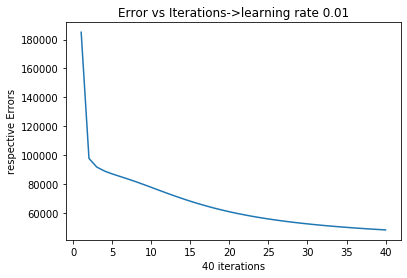

In [7]:
a = [i for i in range(1,41)]
plt.plot(a,err)
#plt.xticks(np.arange(0, 40, 1))
plt.xlabel('40 iterations')
plt.ylabel('respective Errors')
plt.title('Error vs Iterations->learning rate 0.01')
plt.rcParams['figure.figsize'] = [12,4]
plt.show()